In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Acropolis'

link = 'https://rally-base.com/2023/eko-acropolis-rally-2023/?ssId='
startat, no_ss=7824, int(15) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [2]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [3]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,69,Rovanperä,RC1,00:01:32.9,57.35 0.00,00:00:00.0 00:00:00.0,1,Acropolis,1
2,2,4,Lappi Esa,RC1,00:01:33.2,57.17 0.20,00:00:00.3 00:00:00.3,1,Acropolis,2
3,3,11,Neuville,RC1,00:01:33.3,57.11 0.27,00:00:00.4 00:00:00.1,1,Acropolis,3
4,4,6,Sordo Dan,RC1,00:01:33.4,57.04 0.34,00:00:00.5 00:00:00.1,1,Acropolis,4
5,5,8,Tänak Ott,RC1,00:01:33.6,56.92 0.47,00:00:00.7 00:00:00.2,1,Acropolis,5
...,...,...,...,...,...,...,...,...,...,...
49,18,83,Šekuljica,RC5,00:07:02.0,76.78 3.77,00:00:33.9 00:00:00.0,15,Acropolis,49
50,18,84,Parellis,RC5,00:07:02.0,76.78 3.77,00:00:33.9 00:00:00.0,15,Acropolis,50
51,18,85,Kaltsounis,RC4,00:07:02.0,76.78 3.77,00:00:33.9 00:00:00.0,15,Acropolis,51
52,52,9,Serderidis,RC1,00:07:22.9,73.15 6.09,00:00:54.8 00:00:20.9,15,Acropolis,52


In [4]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [5]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [6]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.png'))


In [7]:
rally2023_ClassView

0                              Pos.                                          \
ss                               1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                     
4   Lappi  Esa RC1   Acropolis    2   7   6   3   4   7   7  29   7   7   6   
6   Sordo  Dan RC1   Acropolis    4   6   8   6   5   8   6   8   4   4   5   
7   Loubet  P. RC1   Acropolis    8  67  65  65   -   -   -   -   -   -   -   
8   Tänak  Ott RC1   Acropolis    5   3   4   3   1   1   5   7   5   5   4   
9   Serderidis RC1   Acropolis   32  26  31   9  28  35  23  25  20  18  22   
...                             ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
81  Panteli  C RC4   Acropolis   65  57  54  10  52  49  46  45  22  38  56   
82  Kanellopou RC4   Acropolis   68  64  64  10  59  64  62  53  60  58  56   
83  Šekuljica  RC5   Acropolis   60  62  63  10  56  58  55  50  22  63  62   
84  Parellis   RC5   Acropolis   62  60  61  10  55  55  52  46  22  42  40   
85  Kaltsounis RC4   Acropolis   67  65  68  66  67  66  59  62  60  58  56   

0                                               
ss                              12  13  14  15  
No. Crew       Group Race                       
4   Lappi  Esa RC1   Acropolis  15   5  15   5  
6   Sordo  Dan RC1   Acropolis   2   2   1   4  
7   Loubet  P. RC1   Acropolis   -   -   -   -  
8   Tänak  Ott RC1   Acropolis   3   4   3   3  
9   Serderidis RC1   Acropolis  16  23  27  52  
...                             ..  ..  ..  ..  
81  Panteli  C RC4   Acropolis  56  45  32  18  
82  Kanellopou RC4   Acropolis  56  53  32  18  
83  Šekuljica  RC5   Acropolis  62  51  32  18  
84  Parellis   RC5   Acropolis  41  50  32  18  
85  Kaltsounis RC4   Acropolis  56  54  32  18  

[69 rows x 15 columns]

In [8]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,69,Rovanperä,RC1,1,Acropolis,1,92.9
2,4,Lappi Esa,RC1,1,Acropolis,2,93.2
3,11,Neuville,RC1,1,Acropolis,3,93.3
4,6,Sordo Dan,RC1,1,Acropolis,4,93.4
5,8,Tänak Ott,RC1,1,Acropolis,5,93.6
...,...,...,...,...,...,...,...
49,83,Šekuljica,RC5,15,Acropolis,49,422.0
50,84,Parellis,RC5,15,Acropolis,50,422.0
51,85,Kaltsounis,RC4,15,Acropolis,51,422.0
52,9,Serderidis,RC1,15,Acropolis,52,442.9


In [9]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Group'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race      ss Group             
Acropolis 1  RC1           92.9
             RC2           95.0
             RC3          101.7
             RC4          109.7
             RC5          115.5
...                         ...
          15 RC1          388.1
             RC2          405.0
             RC3          422.0
             RC4          422.0
             RC5          422.0

[75 rows x 1 columns]

In [10]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Group'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9
...,...,...,...,...,...,...,...,...,...
942,81,Panteli C,RC4,15,Acropolis,47,422.0,422.0,388.1
943,82,Kanellopou,RC4,15,Acropolis,48,422.0,422.0,388.1
944,85,Kaltsounis,RC4,15,Acropolis,51,422.0,422.0,388.1
945,83,Šekuljica,RC5,15,Acropolis,49,422.0,422.0,388.1


In [11]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F['diff_Gr']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_Gr%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9,0.3,0.322928,01,0.3,0.322928
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9,0.4,0.430571,01,0.4,0.430571
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9,0.5,0.538213,01,0.5,0.538213
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9,0.7,0.753498,01,0.7,0.753498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,81,Panteli C,RC4,15,Acropolis,47,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
943,82,Kanellopou,RC4,15,Acropolis,48,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
944,85,Kaltsounis,RC4,15,Acropolis,51,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
945,83,Šekuljica,RC5,15,Acropolis,49,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000


In [30]:
Group = 'RC4'
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains(Group)]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
58,79,Fontana M,RC4,1,Acropolis,51,109.7,109.7,92.9,16.8,18.083961,01,0.0,0.000000
59,77,Plagos Io,RC4,1,Acropolis,52,110.2,109.7,92.9,17.3,18.622174,01,0.5,0.455789
60,76,Chatzimark,RC4,1,Acropolis,54,110.4,109.7,92.9,17.5,18.837460,01,0.7,0.638104
61,75,Lefkaditis,RC4,1,Acropolis,58,113.1,109.7,92.9,20.2,21.743811,01,3.4,3.099362
62,80,Kalamaras,RC4,1,Acropolis,63,120.4,109.7,92.9,27.5,29.601722,01,10.7,9.753874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,79,Fontana M,RC4,15,Acropolis,45,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
941,80,Kalamaras,RC4,15,Acropolis,46,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
942,81,Panteli C,RC4,15,Acropolis,47,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
943,82,Kanellopou,RC4,15,Acropolis,48,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000


In [31]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
58,79,Fontana M,RC4,1,Acropolis,51,109.7,109.7,92.9,16.8,18.083961,01,0.0,0.000000
59,77,Plagos Io,RC4,1,Acropolis,52,110.2,109.7,92.9,17.3,18.622174,01,0.5,0.455789
60,76,Chatzimark,RC4,1,Acropolis,54,110.4,109.7,92.9,17.5,18.837460,01,0.7,0.638104
61,75,Lefkaditis,RC4,1,Acropolis,58,113.1,109.7,92.9,20.2,21.743811,01,3.4,3.099362
62,80,Kalamaras,RC4,1,Acropolis,63,120.4,109.7,92.9,27.5,29.601722,01,10.7,9.753874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,79,Fontana M,RC4,15,Acropolis,45,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
941,80,Kalamaras,RC4,15,Acropolis,46,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
942,81,Panteli C,RC4,15,Acropolis,47,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000
943,82,Kanellopou,RC4,15,Acropolis,48,422.0,422.0,388.1,33.9,8.734862,15,0.0,0.000000


In [32]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_Gr', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Acropolis                                                          \
SS.               01     02     03     04     05     06     07     08     09   
Crew                                                                           
Chatzimark       0.7    0.0    0.0    0.0   10.2   21.6    0.0   25.1    0.0   
Fontana  M       0.0    1.8   87.2    0.0    0.0    0.0   20.6    0.0    0.0   
Kalamaras       10.7   56.2   87.0    0.0   95.2  168.6  177.1  208.9    0.0   
Kaltsounis      44.8  114.9  600.0  600.0  600.0  600.0  600.0  600.0  600.0   
Kanellopou      47.5  112.7  239.0    0.0  313.4  554.4  956.3  396.6  600.0   
Lefkaditis       3.4    7.5   36.6    0.0   29.2    4.0   25.3   21.1    0.0   
Panteli  C      14.6   21.9   32.8    0.0   76.1   56.2   60.4   97.2    0.0   
Papageorgi      39.1  108.0  198.4    0.0  561.3  533.4  746.2  490.9    0.0   
Plagos  Io       0.5   10.6   43.0    0.0  301.3  139.8  600.0  600.0  600.0   

Race                                              
SS.            10     11     12     13   14   15  
Crew                                              
Chatzimark  600.0  600.0  600.0    0.0  0.0  0.0  
Fontana  M  133.3    8.4    0.0   42.3  0.0  0.0  
Kalamaras   140.5  140.9  157.9  149.8  0.0  0.0  
Kaltsounis  600.0  600.0  600.0  354.9  0.0  0.0  
Kanellopou  600.0  600.0  600.0  319.1  0.0  0.0  
Lefkaditis    0.0    0.0    2.3    2.2  0.0  0.0  
Panteli  C   89.2  600.0  600.0   77.9  0.0  0.0  
Papageorgi  600.0  600.0  600.0  305.1  0.0  0.0  
Plagos  Io  600.0  600.0  600.0   84.0  0.0  0.0

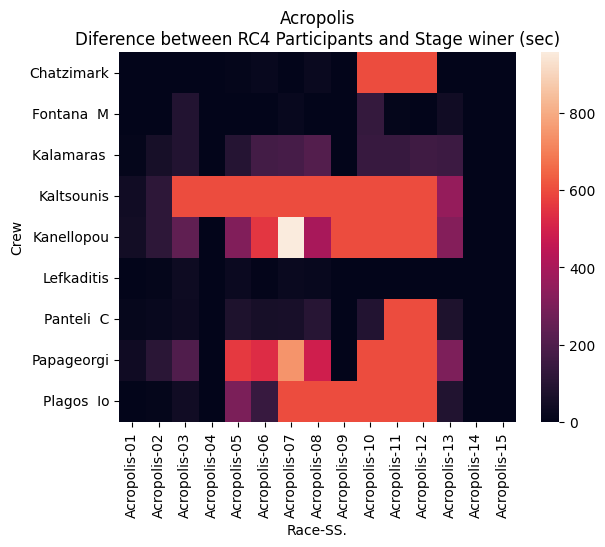

In [33]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")

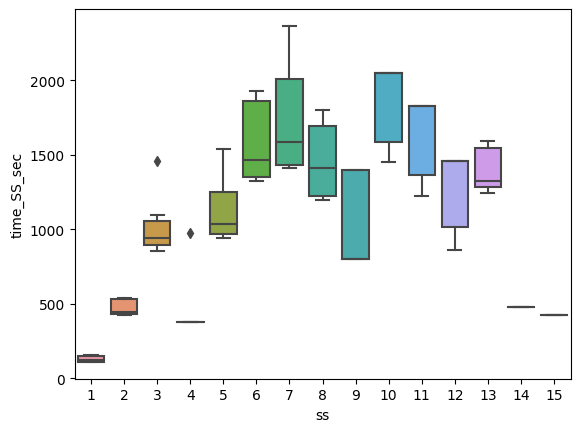

In [34]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot__" + Group + ".png")

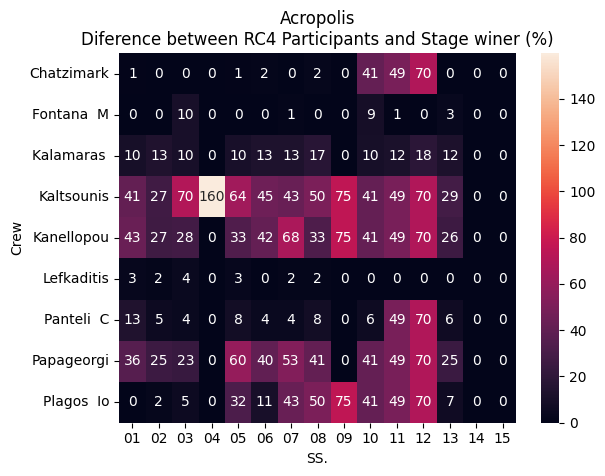

In [35]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff_Gr%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Stage winer (%)')
plt.savefig( Group + ".jpg")